In [ ]:
#name:tarunkumar R
#rollno:25MML0057

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Dense
import cv2
import os 
import glob

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load Dataset
img_dir = "C:/Users/batch1/Downloads/car plate/images" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() 

# storing in X
IMAGE_SIZE = 224
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [3]:
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

In [4]:
from lxml import etree

def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmin), int(ymin), int(xmax), int(ymax)]


path = 'C:/Users/batch1/Downloads/car plate/annotations'
text_files = ['C:/Users/batch1/Downloads/car plate/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [5]:
len(y)

433

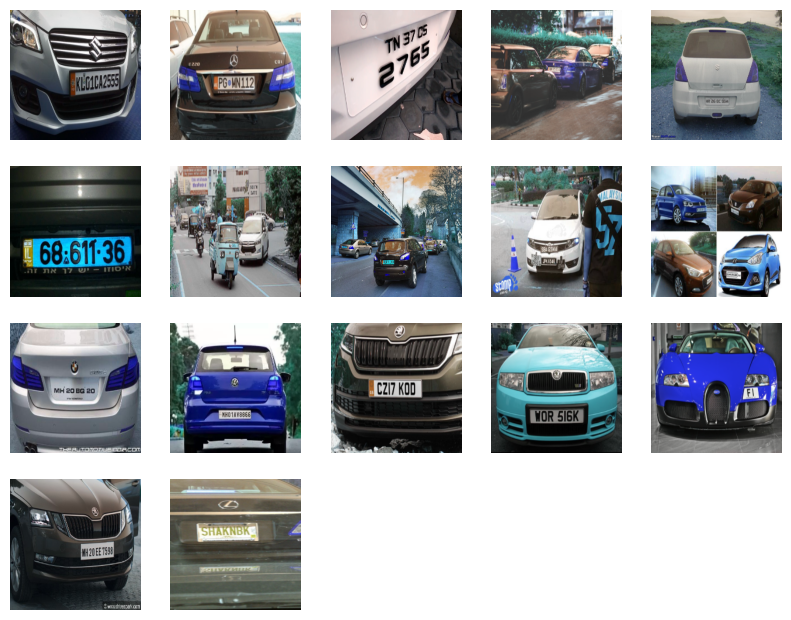

In [6]:
plt.figure(figsize=(10,20))
for i in range(0,17):
    plt.subplot(10,5, i+1)
    plt.axis("off")
    plt.imshow(X[i])



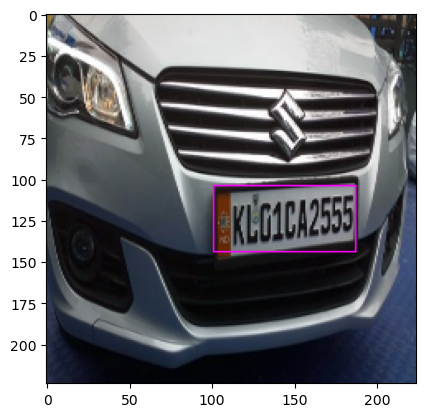

In [7]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

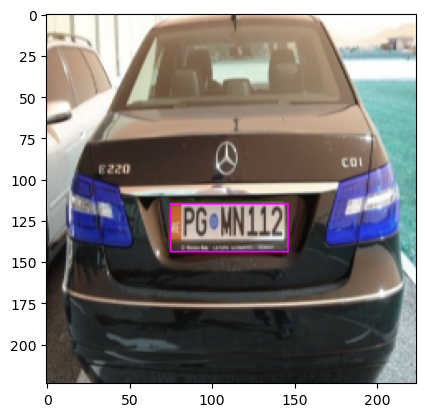

In [8]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

In [9]:
#preprocessing
X = np.array(X)
y = np.array(y)
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

In [10]:
X = X / 255
y = y / IMAGE_SIZE 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [12]:
#CNN with Keras
model = Sequential()
# feature extactor
# 1st covolutional layer
model.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

# 2st covolutional layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


# classification (fully connected layers)
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
train = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
10/10 [==============================] - 5s 428ms/step - loss: 0.1120 - accuracy: 0.5016 - val_loss: 0.0303 - val_accuracy: 0.6571
Epoch 2/50
10/10 [==============================] - 4s 439ms/step - loss: 0.0406 - accuracy: 0.5691 - val_loss: 0.0246 - val_accuracy: 0.6571
Epoch 3/50
10/10 [==============================] - 4s 418ms/step - loss: 0.0307 - accuracy: 0.5659 - val_loss: 0.0210 - val_accuracy: 0.6571
Epoch 4/50
10/10 [==============================] - 4s 428ms/step - loss: 0.0194 - accuracy: 0.7331 - val_loss: 0.0168 - val_accuracy: 0.7143
Epoch 5/50
10/10 [==============================] - 4s 433ms/step - loss: 0.0117 - accuracy: 0.8167 - val_loss: 0.0132 - val_accuracy: 0.7714
Epoch 6/50
10/10 [==============================] - 4s 446ms/step - loss: 0.0068 - accuracy: 0.8521 - val_loss: 0.0120 - val_accuracy: 0.6857
Epoch 7/50
10/10 [==============================] - 4s 449ms/step - loss: 0.0042 - accuracy: 0.8714 - val_loss: 0.0126 - val_accuracy: 0.7429
Epoch 

In [13]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 70.11%


In [14]:
#using VGG16
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping

# Create the model
model = Sequential()
# feature extraction
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

# classification
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

# Freeze VGG16 base layers
model.layers[0].trainable = False

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
train = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                  epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

58889256/58889256 [==============================] - 17s 0us/step
Epoch 1/50
10/10 [==============================] - 13s 1s/step - loss: 0.0698 - accuracy: 0.3537 - val_loss: 0.0413 - val_accuracy: 0.6000
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 0.0267 - accuracy: 0.5113 - val_loss: 0.0189 - val_accuracy: 0.6857
Epoch 3/50
10/10 [==============================] - 15s 1s/step - loss: 0.0118 - accuracy: 0.6913 - val_loss: 0.0121 - val_accuracy: 0.6286
Epoch 4/50
10/10 [==============================] - 15s 1s/step - loss: 0.0083 - accuracy: 0.7556 - val_loss: 0.0090 - val_accuracy: 0.7429
Epoch 5/50
10/10 [==============================] - 15s 2s/step - loss: 0.0046 - accuracy: 0.8585 - val_loss: 0.0063 - val_accuracy: 0.8286
Epoch 6/50
10/10 [==============================] - 15s 2s/step - loss: 0.0032 - accuracy: 0.8778 - val_loss: 0.0071 - val_accuracy: 0.8000
Epoch 7/50
10/10 [==============================] - 15s 2s/step - loss: 0.0022 - accuracy: 0.9

In [15]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 80.46%


In [16]:
# Save the trained model
model.save("car_plate_detector.h5")

print("Model saved successfully!")

Model saved successfully!


1/1 [==============================] - 0s 129ms/step


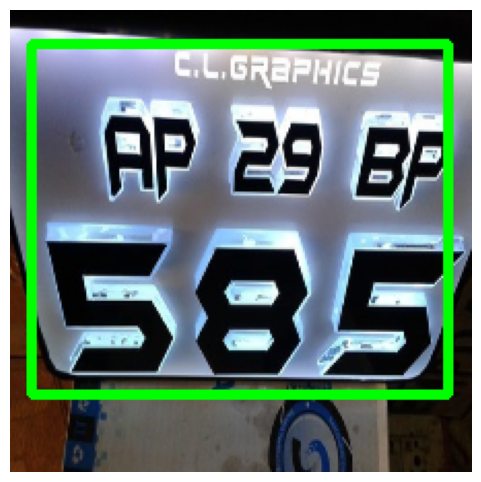

In [17]:
#Number PLate Detection
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model("car_plate_detector.h5")

def detect_car_plate(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))  # Resize to match model input
    img_normalized = img_resized / 255.0       # Normalize

    # Expand dimensions to match model input shape (1, 224, 224, 3)
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predict bounding box
    pred = model.predict(img_input)[0]  # Get first (and only) prediction
    xmin, ymin, xmax, ymax = pred * IMAGE_SIZE  # Scale coordinates back

    # Draw rectangle on original image
    img_with_box = img_resized.copy()
    cv2.rectangle(img_with_box, 
                  (int(xmin), int(ymin)), 
                  (int(xmax), int(ymax)), 
                  (0, 255, 0), 3)

    # Display the result
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

test_image = "C:/Users/batch1/Downloads/car plate/images/Cars114.png"  # Replace with actual image path
detect_car_plate(test_image)

In [18]:
import tensorflow as tf

def calculate_iou(y_true, y_pred):
    # y_true and y_pred are normalized [xmin, ymin, xmax, ymax]
    
    # Calculate intersection coordinates
    xmin_inter = tf.maximum(y_true[:, 0], y_pred[:, 0])
    ymin_inter = tf.maximum(y_true[:, 1], y_pred[:, 1])
    xmax_inter = tf.minimum(y_true[:, 2], y_pred[:, 2])
    ymax_inter = tf.minimum(y_true[:, 3], y_pred[:, 3])

    # Calculate intersection area
    # Max with 0 to handle cases with no overlap
    intersection_area = tf.maximum(xmax_inter - xmin_inter, 0) * tf.maximum(ymax_inter - ymin_inter, 0)

    # Calculate areas of true and predicted boxes
    true_area = (y_true[:, 2] - y_true[:, 0]) * (y_true[:, 3] - y_true[:, 1])
    pred_area = (y_pred[:, 2] - y_pred[:, 0]) * (y_pred[:, 3] - y_pred[:, 1])

    # Calculate union area
    union_area = true_area + pred_area - intersection_area

    # Calculate IoU
    iou = intersection_area / (union_area + 1e-6) # Add epsilon to avoid division by zero
    
    return tf.reduce_mean(iou)

# After your model is trained and saved:
# ...
# Test the model and get predictions
y_pred = model.predict(X_test)
# Calculate the mean IoU score across your test set
mean_iou = calculate_iou(y_test, y_pred)
print(f"Mean IoU Score: {mean_iou.numpy():.4f}")

3/3 [==============================] - 3s 846ms/step
Mean IoU Score: 0.3558


1/1 [==============================] - 0s 56ms/step


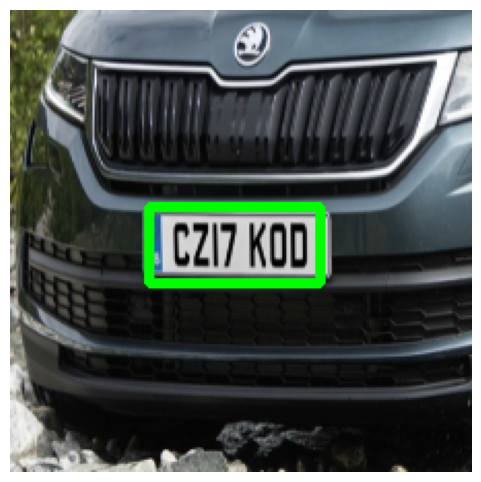

In [19]:
test_image = "C:/Users/batch1/Downloads/car plate/images/Cars109.png"  # Replace with actual image path
detect_car_plate(test_image)

1/1 [==============================] - 0s 56ms/step


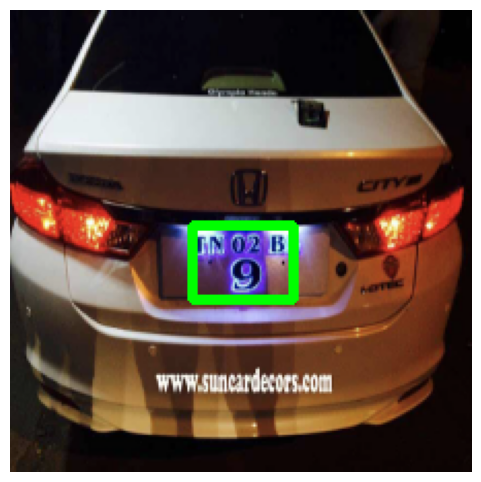

In [20]:
test_image = "C:/Users/batch1/Downloads/car plate/images/Cars138.png"  # Replace with actual image path
detect_car_plate(test_image)

1/1 [==============================] - 0s 60ms/step


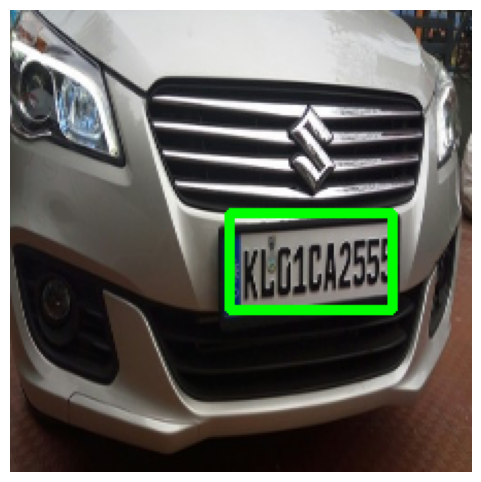

In [21]:
test_image = "C:/Users/batch1/Downloads/car plate/images/Cars147.png"  # Replace with actual image path
detect_car_plate(test_image)

1/1 [==============================] - 0s 56ms/step


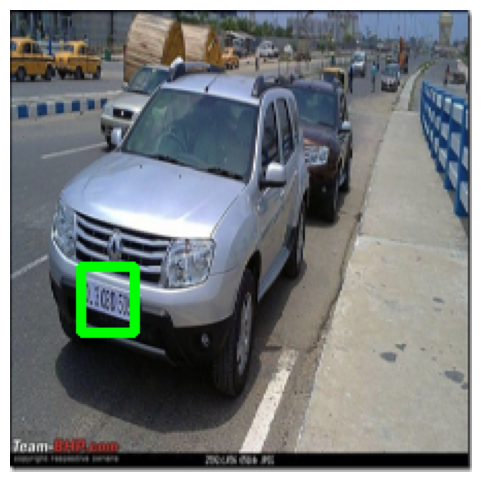

In [22]:
test_image = "C:/Users/batch1/Downloads/car plate/images/Cars151.png"
detect_car_plate(test_image)

1/1 [==============================] - 0s 65ms/step


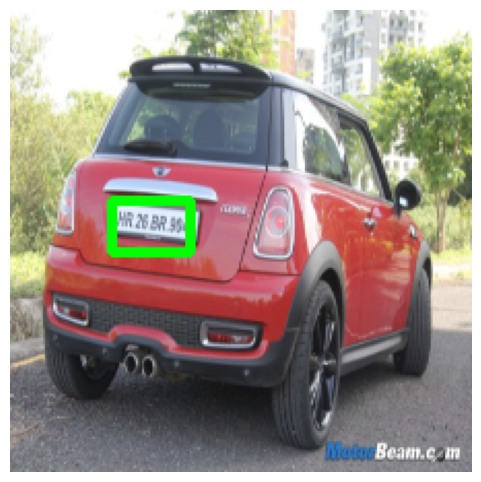

In [23]:
test_image="C:/Users/batch1/Downloads/car plate/images/Cars130.png"
detect_car_plate(test_image)